In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt    

%matplotlib inline
import warnings

warnings.filterwarnings('ignore')
from tqdm import tqdm

In [2]:
rlimit=10000

``` * No of Chunks = 12 *
```

#### Total Rows

In [15]:
tot_len =0
for i in range(1,13):
    data = pd.read_csv('C:\\Users\\sushant\\Documents\\New Start\\Datasets\\Bosch\\Chunks\\Numeric\\train_'+str(i)+'.gzip',nrows=rlimit,compression='gzip',usecols=[1])
    tot_len +=len(data)
    del data
tot_len

120000

In [3]:
data = pd.read_csv('C:\\Users\\sushant\\Documents\\New Start\\Datasets\\Bosch\\Chunks\\Numeric\\train_'+str(2)+'.gzip',nrows=rlimit,compression='gzip',usecols=[1,2])

In [ ]:
#data= pd.read_csv('C:\\Users\\sushant\\Documents\\New Start\\Datasets\\Bosch\\Chunks\\Numeric\\train_'+str(2)+'.gzip',nrows=rlimit,compression='gzip',usecols=[1,2])

In [4]:
x=data.columns.values.tolist()
pd.DataFrame(pd.isnull(data[[x[0]]]).sum(),columns={'NullCount'})

    

,NullCount
L0_S0_F0,4221


<Container object of 9 artists>

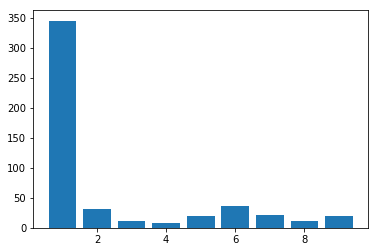

In [5]:
train=pd.read_csv('train_numeric.csv.zip',compression='zip', usecols=['Id','Response'])
failure_ids = sorted(train[train['Response']==1]['Id'].values)
from tqdm import tqdm
count = {}

for i in range(1, len(failure_ids)):
    d = abs(failure_ids[i] - failure_ids[i-1])
    if d not in count:
        count[d] = 0            
    count[d] = count[d] + 1

near = {k:v for k,v in count.items() if k < 10 or v > 50}
plt.bar(near.keys(), near.values())


In [7]:
train.Response.value_counts()

0    1176868
1       6879
Name: Response, dtype: int64

In [8]:
del train

Nulls Feature-wise

In [ ]:
nullFrame=pd.DataFrame()

for i in tqdm(range(970)):
    for j in range(1,13):
        data = pd.read_csv('C:\\Users\\sushant\\Documents\\New Start\\Datasets\\Bosch\\Chunks\\Numeric\\train_'+str(j)+'.gzip',compression='gzip',usecols=[i])
        nullFrame =nullFrame.append(pd.DataFrame(pd.isnull(data).sum(),columns={'NullCount'}).reset_index().rename(columns={'index':'Features'}))
        del data

  1%|▉                                                                              | 11/970 [06:09<8:51:52, 33.28s/it]

In [9]:
nullFrame=pd.DataFrame()

for j in tqdm(range(1,13)):
    data = pd.read_csv('C:\\Users\\sushant\\Documents\\New Start\\Datasets\\Bosch\\Chunks\\Numeric\\train_'+str(j)+'.gzip',compression='gzip',chunksize=20000)
    for k in tqdm(data):
        for i in k.columns.values.tolist():
            nullFrame =nullFrame.append(pd.DataFrame(pd.isnull(k[[i]]).sum(),columns={'NullCount'}).reset_index().rename(columns={'index':'Features'}))
        del k

  0%|                                                                                           | 0/12 [00:00<?, ?it/s]
0it [00:00, ?it/s]
1it [00:04,  4.58s/it]
2it [00:09,  4.66s/it]


KeyboardInterrupt: 

In [7]:
#nullFrame.to_csv('NullFrame.csv')

In [10]:
del nullFrame

In [11]:
import gc
gc.collect(0)

9

In [13]:
nullFrame = pd.read_csv('C:\\Users\\sushant\\Documents\\New Start\\Datasets\\Bosch\\Other Analysis results\\NullFrame.csv')

In [14]:
len(nullFrame[['Features']])

58200

In [15]:
nullFrame.head()

,Unnamed: 0,Features,NullCount
0,0,Id,0
1,0,L0_S0_F0,8505
2,0,L0_S0_F2,8505
3,0,L0_S0_F4,8505
4,0,L0_S0_F6,8505


In [16]:
nullFrame=nullFrame.drop('Unnamed: 0',1)

In [17]:
nullFrame['TotalRows'] = 1183747
nullFrame['FaultCount'] = nullFrame['TotalRows']-nullFrame['NullCount']
nullFrame

,Features,NullCount,TotalRows,FaultCount
0,Id,0,1183747,1183747
1,L0_S0_F0,8505,1183747,1175242
2,L0_S0_F2,8505,1183747,1175242
3,L0_S0_F4,8505,1183747,1175242
4,L0_S0_F6,8505,1183747,1175242
5,L0_S0_F8,8505,1183747,1175242
6,L0_S0_F10,8505,1183747,1175242
7,L0_S0_F12,8505,1183747,1175242
8,L0_S0_F14,8505,1183747,1175242
9,L0_S0_F16,8505,1183747,1175242


In [18]:
#nullFrame.sort('Features')[nullFrame['Features']=='L0_S0_F10'].sum()

In [19]:
nullFrame=nullFrame[['Features',	'FaultCount']].groupby('Features').sum().reset_index()

In [20]:
970*12*5

58200

In [21]:
nullFrame=nullFrame[(nullFrame['Features']!='Id')&(nullFrame['Features']!='Response')]

In [22]:
nullFrame['LineNo']=nullFrame['Features'].apply(lambda l: l.split('_')[0])
nullFrame['StationNo']=nullFrame['Features'].apply(lambda l: l.split('_')[1])
nullFrame['FeatureNo']=nullFrame['Features'].apply(lambda l: l.split('_')[2])
nullFrame

,Features,FaultCount,LineNo,StationNo,FeatureNo
1,L0_S0_F0,70514935,L0,S0,F0
2,L0_S0_F10,70514935,L0,S0,F10
3,L0_S0_F12,70514935,L0,S0,F12
4,L0_S0_F14,70514935,L0,S0,F14
5,L0_S0_F16,70514935,L0,S0,F16
6,L0_S0_F18,70514935,L0,S0,F18
7,L0_S0_F2,70514935,L0,S0,F2
8,L0_S0_F20,70514935,L0,S0,F20
9,L0_S0_F22,70514935,L0,S0,F22
10,L0_S0_F4,70514935,L0,S0,F4


In [ ]:
nullFrame[]

In [23]:
nullFrame[['StationNo','LineNo']].drop_duplicates().reset_index()

,index,StationNo,LineNo
0,1,S0,L0
1,13,S10,L0
2,25,S11,L0
3,37,S12,L0
4,49,S13,L0
5,51,S14,L0
6,60,S15,L0
7,69,S16,L0
8,71,S17,L0
9,73,S18,L0


In [28]:
nullFrame[['StationNo','FaultCount']].groupby('StationNo').mean().sort('FaultCount')#.plot(kind='barh',figsize=(15,10))

,FaultCount
StationNo,
S28,69850656
S25,69854521
S32,69865616
S38,69868215
S49,69870743
S44,69870877
S50,69871432
S43,69871621
S31,69880076


In [31]:
nullFrame[['LineNo','FaultCount']].groupby('LineNo').mean().sort('FaultCount')

,FaultCount
LineNo,
L1,69866551
L2,69960180
L0,70078593
L3,70489095


In [35]:
stFrame=nullFrame[['StationNo','FaultCount']].groupby('StationNo').mean().sort('FaultCount')
stFrame['FaultCount']=stFrame['FaultCount']-np.mean(stFrame['FaultCount'])

ValueError: Invalid RGBA argument: 'S28'

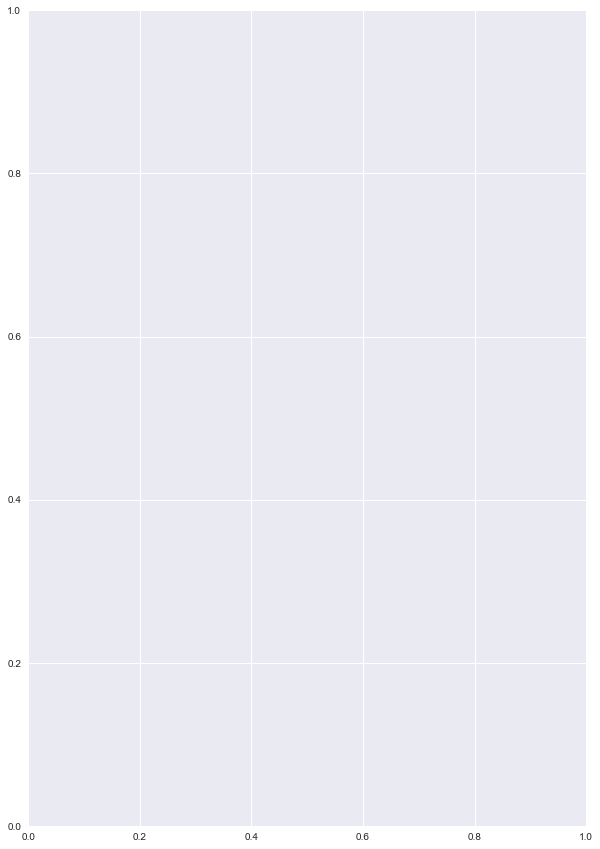

In [36]:
stFrame.plot(kind='barh',figsize=(10,15),color=stFrame.index.values)

In [42]:
def histo(df):
    cat_var= df.select_dtypes(include = ['object']).columns.values.tolist()
    j=0
    k=0
    plt.figure(figsize=(12, 16))
    #f, axarr = plt.subplots(10, 2)#, figsize=(18, 12))
    #plt.plot(df[cat_var[2]])
    
    
    for i in cat_var:
        sns.countplot(y=df[i])
    return    
    sns.distplot(df[i],ax=axarr[k,j])
    axarr[j].set_title('DISTPLOT')
    #sns.barplot(x=feature, y="SalePrice",  data=train_data,ax=axarr[1],estimator=median)
    #axarr[1].set_title('BARPLOT - MEDIAN')
    #sns.barplot(x=feature, y="SalePrice",  data=train_data,ax=axarr[2],estimator=mean)
    #axarr[2].set_title('BARPLOT - MEAN')
    plt.suptitle(i,size=16,x=0,y=1)
    #plt.subplots_adjust(top=0.85)
    plt.tight_layout()
    if j<2:
        j=j+1
    else:
        k=k+1
        j=0

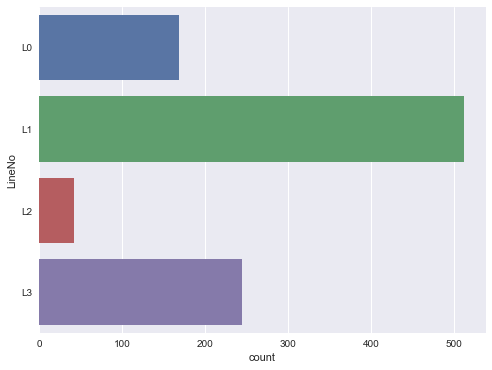

In [38]:
import seaborn as sns
histo(nullFrame[['LineNo']])

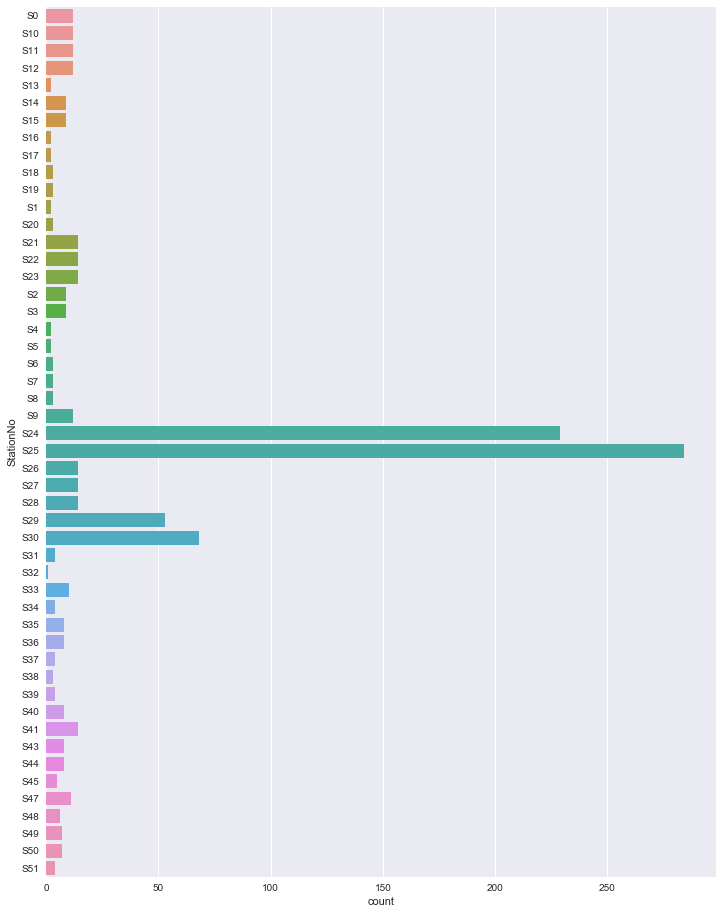

In [46]:
histo(nullFrame[['StationNo']])